### Grid Search with k-Cross Validation

In [15]:
# imports
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix ,recall_score ,precision_score,f1_score,roc_curve,roc_auc_score
from sklearn import linear_model, datasets
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Non-Normalized
X1 = pd.read_csv('Error_50k+test+10e_may18.csv')
# # Normalized
# X2 = pd.read_csv('Pref_nocat_ohe_1.csv')
# # PCA
# X3 = pd.read_csv('PCA_nocat_1.csv')

In [17]:
Y = X1['Rating']
X1 = X1.drop('Rating',1)

In [18]:
# split into training and testing
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, train_size=0.8,test_size = 0.2, random_state = 10)
# x2_train, x2_test, y2_train, y2_test = train_test_split(X2, lab, train_size=0.8,test_size = 0.2, random_state = 13)
# x3_train, x3_test, y3_train, y3_test = train_test_split(X3, lab, train_size=0.8,test_size = 0.2, random_state = 15)

In [19]:
# imports
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import GridSearchCV

In [20]:
# List of parameters
tree_param = {'criterion': ['gini', 'entropy'],'max_depth' : [3,5,7,9]}
forest_param = {'n_estimators' :[25,50,100,150,200,250] ,'criterion': ['gini', 'entropy'] }
extra_param = {'n_estimators' :[25,50,100,150,200,250] ,'criterion': ["gini", "entropy"]}
bag_param = {'base_estimator' :['DecisionTreeClassifier','RandomForestClassfier'],'n_estimators' : [10,50,100,150,200]}

In [21]:
# Visualise the results of gridsearch over differnet combination of  parameters for one data set.
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
#     from matplotlib      import pyplot as plt
#     from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]


    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()


#### Decision Trees Grid Search

In [22]:
def gridSearch_d_tree(X,Y,x_train,x_test,y_train,y_test) :
    dtree_clf= GridSearchCV(DecisionTreeClassifier(),param_grid=tree_param,
                     scoring='accuracy',cv=10,n_jobs=-1)
    dtree_clf.fit(X, Y)
    results = dtree_clf.cv_results_
    print("Best parameters set found on development set:")
    print(dtree_clf.best_params_)
    best_param = dtree_clf.best_params_
    print()
    print("Grid scores on development set:")
    print()
    means = dtree_clf.cv_results_['mean_test_score']
    stds = dtree_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, dtree_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, dtree_clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()
    return dtree_clf
    

Best parameters set found on development set:
{'criterion': 'entropy', 'max_depth': 9}

Grid scores on development set:

0.617 (+/-0.008) for {'criterion': 'gini', 'max_depth': 3}
0.787 (+/-0.135) for {'criterion': 'gini', 'max_depth': 5}
0.793 (+/-0.204) for {'criterion': 'gini', 'max_depth': 7}
0.795 (+/-0.215) for {'criterion': 'gini', 'max_depth': 9}
0.588 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 3}
0.800 (+/-0.079) for {'criterion': 'entropy', 'max_depth': 5}
0.816 (+/-0.092) for {'criterion': 'entropy', 'max_depth': 7}
0.818 (+/-0.104) for {'criterion': 'entropy', 'max_depth': 9}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.89      0.91      0.90       880
          1       0.90      0.65      0.75      2798
          2       0.82      0.96      0.88      2786
          3       0.89      0.95      0.91   

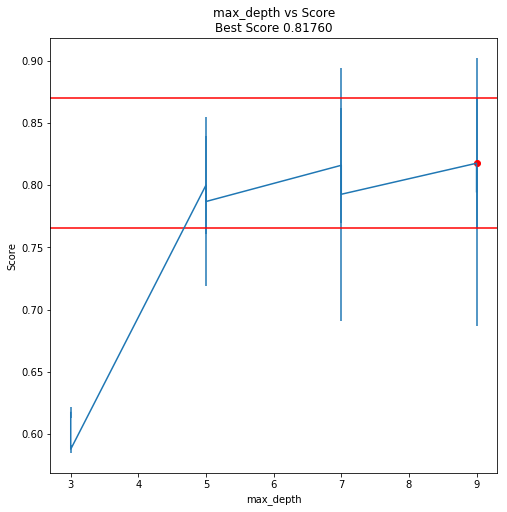

In [23]:

grid_clf = gridSearch_d_tree(X1,Y,x1_train,x1_test,y1_train,y1_test)
GridSearch_table_plot(grid_clf, "max_depth", negative=False)

In [24]:
def gridSearch_rand_forest(X,Y,x_train,x_test,y_train,y_test):
    forest_clf= GridSearchCV(RandomForestClassifier(),param_grid=forest_param,
                     scoring='accuracy',cv=10,n_jobs=-1)
    forest_clf.fit(X,Y)
    print("Best parameters set found on development set:")
    print(forest_clf.best_params_)
    best_param = forest_clf.best_params_
    print()
    print("Grid scores on development set:")
    print()
    means = forest_clf.cv_results_['mean_test_score']
    stds = forest_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, forest_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, forest_clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()
    return forest_clf

Best parameters set found on development set:
{'criterion': 'entropy', 'n_estimators': 50}

Grid scores on development set:

0.748 (+/-0.333) for {'criterion': 'gini', 'n_estimators': 25}
0.753 (+/-0.331) for {'criterion': 'gini', 'n_estimators': 50}
0.753 (+/-0.336) for {'criterion': 'gini', 'n_estimators': 100}
0.756 (+/-0.321) for {'criterion': 'gini', 'n_estimators': 150}
0.751 (+/-0.344) for {'criterion': 'gini', 'n_estimators': 200}
0.755 (+/-0.333) for {'criterion': 'gini', 'n_estimators': 250}
0.781 (+/-0.228) for {'criterion': 'entropy', 'n_estimators': 25}
0.787 (+/-0.205) for {'criterion': 'entropy', 'n_estimators': 50}
0.770 (+/-0.277) for {'criterion': 'entropy', 'n_estimators': 100}
0.778 (+/-0.240) for {'criterion': 'entropy', 'n_estimators': 150}
0.786 (+/-0.210) for {'criterion': 'entropy', 'n_estimators': 200}
0.760 (+/-0.310) for {'criterion': 'entropy', 'n_estimators': 250}

Detailed classification report:

The model is trained on the full development set.
The score

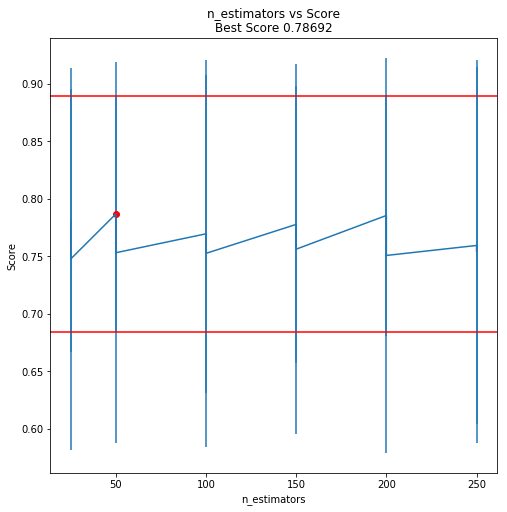

In [25]:

grid_clf = gridSearch_rand_forest(X1,Y,x1_train,x1_test,y1_train,y1_test)
GridSearch_table_plot(grid_clf, "n_estimators", negative=False)

#### Grid Search Extra Trees 

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
def gridSearch_extra(X,Y,x_train,x_test,y_train,y_test):
    extra_clf= GridSearchCV(ExtraTreesClassifier(),param_grid=extra_param,
                     scoring='accuracy',cv=10,n_jobs=-1)
    extra_clf.fit(X,Y)
    print("Best parameters set found on development set:")
    print(extra_clf.best_params_)
    best_param = extra_clf.best_params_
    print()
    print("Grid scores on development set:")
    print()
    means = extra_clf.cv_results_['mean_test_score']
    stds = extra_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, extra_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, extra_clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()
    return extra_clf

Best parameters set found on development set:
{'criterion': 'gini', 'n_estimators': 250}

Grid scores on development set:

0.738 (+/-0.017) for {'criterion': 'gini', 'n_estimators': 25}
0.761 (+/-0.013) for {'criterion': 'gini', 'n_estimators': 50}
0.772 (+/-0.015) for {'criterion': 'gini', 'n_estimators': 100}
0.782 (+/-0.011) for {'criterion': 'gini', 'n_estimators': 150}
0.783 (+/-0.009) for {'criterion': 'gini', 'n_estimators': 200}
0.786 (+/-0.015) for {'criterion': 'gini', 'n_estimators': 250}
0.741 (+/-0.022) for {'criterion': 'entropy', 'n_estimators': 25}
0.763 (+/-0.021) for {'criterion': 'entropy', 'n_estimators': 50}
0.782 (+/-0.012) for {'criterion': 'entropy', 'n_estimators': 100}
0.783 (+/-0.011) for {'criterion': 'entropy', 'n_estimators': 150}
0.785 (+/-0.012) for {'criterion': 'entropy', 'n_estimators': 200}
0.786 (+/-0.014) for {'criterion': 'entropy', 'n_estimators': 250}

Detailed classification report:

The model is trained on the full development set.
The scores 

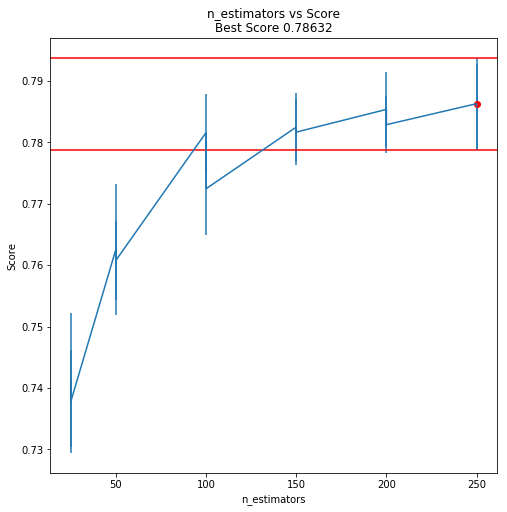

In [28]:

grid_clf = gridSearch_extra(X1,Y,x1_train,x1_test,y1_train,y1_test)
GridSearch_table_plot(grid_clf, "n_estimators", negative=False)